# CMSC478 Machine Learning - Spring 2021

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-2: Regression - Stock Market Prediction</font>

**Caleb M. McLaren, CU01417** 

## Overview and Learning Objectives

In your second assignment, you are going to implement and train regression models. As mentioned in the lectures, regression models can predict a numeric value.

The ML task in this assignment is regression, predicting the `Close` price of Apple stock index [**AAPL**](https://www.google.com/finance/quote/AAPL:NASDAQ). 

<b>Very Important Note:</b>
**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!** If you don't run some cells in a part, the whole part gets zero even if you write some codes in them.

All assignments are indvidual tasks and students are strictly prohibited from collaboration on assignments in Discord and other platforms. Students are responsible to debug the code and resolve any errors that may arise independently. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

Pedagogically, this assignment will help you:
- better understand regression. 
- practice with regression performance metrics.
- practice with matplotlib and learn how to generate different plots.
- gain experience with financial technical analysis and stock market prediction.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct.

The first thing to do is importing all necessary python and sklearn modules. **You definitely need to add to the following imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this cell.

In [72]:
# Import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


#from xgboost import XGBRegressor
import xgboost
from scipy.stats import uniform, loguniform, randint

import warnings
warnings.filterwarnings('ignore')

## Part I - Preprocessing

You should install [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/). In Linux, it's as easy as running the following pip command in your notebook. In other OS, you may need to install it via Anaconda command prompt.

In [ ]:
#!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr

> Now you can read the data live from the web. One good source for stock market data is [Yahoo Finance](https://finance.yahoo.com/quote/AAPL?p=AAPL).

In [3]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-02-26')
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-12,135.529999,133.690002,134.350006,135.369995,60029300.0,135.369995
2021-02-16,136.009995,132.789993,135.490005,133.190002,80576300.0,133.190002
2021-02-17,132.220001,129.470001,131.250000,130.839996,97918500.0,130.839996
2021-02-18,130.000000,127.410004,129.199997,129.710007,96856700.0,129.710007
2021-02-19,130.710007,128.800003,130.240005,129.869995,87668800.0,129.869995
2021-02-22,129.720001,125.599998,128.009995,126.000000,103916400.0,126.000000
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


> Cool! You can switch to a different stock index and you can use different cutoff dates, but not for this assignment! To make all submissions consistent, don't change the dates, source and stock index.

> The data from Yahoo Finance is already very clean; however, you should always try to get some insights initially.

In [4]:
df.reset_index(inplace=True)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2303.000000,2303.000000,2303.000000,2303.000000,2.303000e+03,2303.000000
mean,40.768029,39.915350,40.345086,40.357003,2.269361e+08,38.642441
std,27.399500,26.611593,27.029006,27.021137,1.790992e+08,27.631704
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,23.092501,22.705357,22.855893,22.805893,1.093298e+08,20.391053
50%,30.525000,30.045000,30.247499,30.295000,1.641152e+08,28.159733
75%,47.552500,46.763750,47.190001,47.182501,2.791866e+08,46.051743
max,145.089996,141.369995,143.600006,143.160004,1.506120e+09,142.946396


> One of the techniques to get more insights about the data before training the regression model is correlation analysis. Correlation analysis tells you which columns are correlated. Pandas dataframe has [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to caclulate the correlations.

In [5]:
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999685,0.999825,0.999780,-0.386792,0.999636
Low,0.999685,1.000000,0.999748,0.999787,-0.395065,0.999657
Open,0.999825,0.999748,1.000000,0.999593,-0.389839,0.999440
Close,0.999780,0.999787,0.999593,1.000000,-0.391277,0.999859
Volume,-0.386792,-0.395065,-0.389839,-0.391277,1.000000,-0.396361
Adj Close,0.999636,0.999657,0.999440,0.999859,-0.396361,1.000000


> You can also visualize the correlations using [seaborn](https://seaborn.pydata.org/installing.html) heatmaps. You should install it if you don't have it, and then you should import it.

<AxesSubplot:>

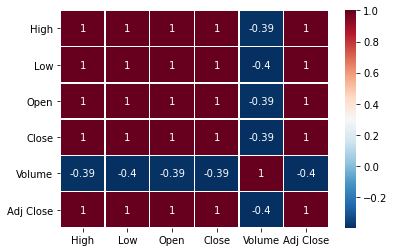

In [6]:
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

> Next, drop `Volume` and `Adj Close` as they are not useful for our regression analysis.

In [7]:
# Prepare the dataframe
df = df.drop(columns=["Volume", "Adj Close"])
df.head(10)

,Date,High,Low,Open,Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786
1,2012-01-04,14.810000,14.617143,14.642857,14.765714
2,2012-01-05,14.948214,14.738214,14.819643,14.929643
3,2012-01-06,15.098214,14.972143,14.991786,15.085714
4,2012-01-09,15.276786,15.048214,15.196429,15.061786
5,2012-01-10,15.214286,15.053571,15.211071,15.115714
6,2012-01-11,15.101786,14.975357,15.095714,15.091071
7,2012-01-12,15.103571,14.955357,15.081429,15.049643
8,2012-01-13,15.016071,14.952143,14.989286,14.993214
9,2012-01-17,15.213929,15.105714,15.150000,15.167857


> Next, you should generate the exact same plot as given below. EVERYTHING should look exactly the same as this plot. The specifications are as follows:
> - `figsize` should be (16,8)
> - `fontsize` for title should be 18 and for the axis labels should be 16.
> - You should use a [`seaborn`](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) style with the grid displayed in the background and everything else should look the same. 
> - Your plot must have the same title and axis labels.
> - You can see [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to learn how to change specifications.
> - Sometimes you need to run the code twice to see the style correctly.

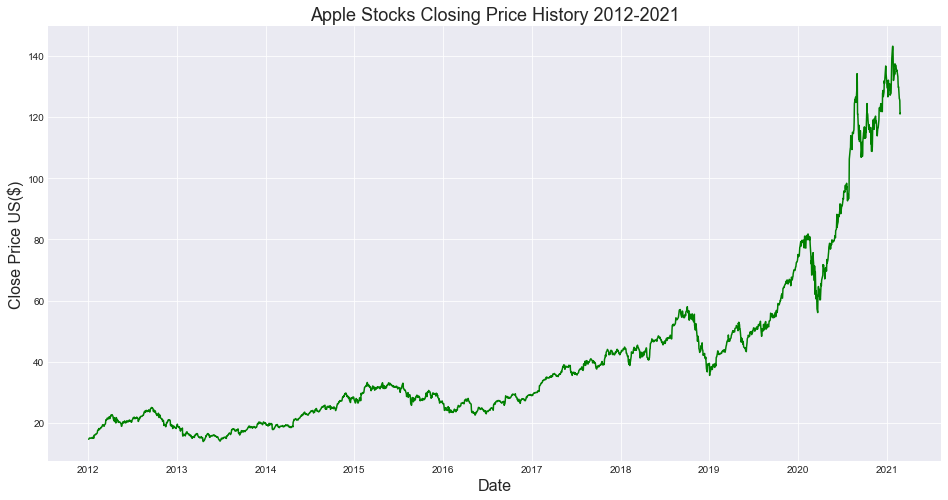

In [8]:
# Generate the following plot. It should be EXACTLY the same!
#plt.title("Apple Stock Closing Price History 2012-2021")
 
plt.figure(figsize=(16,8))
plt.style.use("seaborn-dark")
plt.grid(True)
plt.title("Apple Stocks Closing Price History 2012-2021", fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price US($)", fontsize=16)

date = df["Date"]
close = df["Close"]
plt.plot(date, close, "g", label="Close")



In [ ]:
> Next, you should decompose `Date` to `Year`, `Month`, and `Day`.

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

> Now choose the following columns from `df` in the same order as below:

In [10]:
aapl = df[['Day','Month','Year','High','Open','Low','Close']]
aapl.tail(10)

,Day,Month,Year,High,Open,Low,Close
2293,12,2,2021,135.529999,134.350006,133.690002,135.369995
2294,16,2,2021,136.009995,135.490005,132.789993,133.190002
2295,17,2,2021,132.220001,131.250000,129.470001,130.839996
2296,18,2,2021,130.000000,129.199997,127.410004,129.710007
2297,19,2,2021,130.710007,130.240005,128.800003,129.869995
2298,22,2,2021,129.720001,128.009995,125.599998,126.000000
2299,23,2,2021,126.709999,123.760002,118.389999,125.860001
2300,24,2,2021,125.559998,124.940002,122.230003,125.349998
2301,25,2,2021,126.459999,124.680000,120.540001,120.989998
2302,26,2,2021,124.849998,122.589996,121.199997,121.260002


> Next separate the independent variables (features) from the dependent variable (target column) which is `Close`. So your `X` should contain all columns in `aapl` except `Close` and `y` should include `Close` only.

In [11]:
# Separate features from the target
X = aapl[['Day','Month','Year','High','Open','Low']]
y = aapl[['Close']]


In [12]:
print(X.shape)
print(y.shape)

(2303, 6)
(2303, 1)


> **Important Note**: Double-check and make sure that `X` and `y` do NOT have anything in common; otherwise your whole work will be wrong!

In [13]:
X

,Day,Month,Year,High,Open,Low
0,3,1,2012,14.732143,14.621429,14.607143
1,4,1,2012,14.810000,14.642857,14.617143
2,5,1,2012,14.948214,14.819643,14.738214
3,6,1,2012,15.098214,14.991786,14.972143
4,9,1,2012,15.276786,15.196429,15.048214
...,...,...,...,...,...,...
2298,22,2,2021,129.720001,128.009995,125.599998
2299,23,2,2021,126.709999,123.760002,118.389999
2300,24,2,2021,125.559998,124.940002,122.230003
2301,25,2,2021,126.459999,124.680000,120.540001


In [14]:
y

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786
...,...
2298,126.000000
2299,125.860001
2300,125.349998
2301,120.989998


As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We usually do this by importing [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module from scikit-learn.
Split the data by a `test_size` ratio of 0.25

In [15]:
# Partition the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1727, 6)
(576, 6)
(1727, 1)
(576, 1)


## Part-II Linear Regression with Closed Form Solution (Least Squares)

Now that the data is prepared, you can train and test regression models.

First, you are going to use the Least Squares method using the normal equation. You can check the slides and see examples of the closed form solution (Least Squares) there. You don't have to add a column containing ones. It is fine to add ones similar to the slides/textbook example but you don't have to, you can directly get `theta_best` from `X_train` and `y_train` using normal equation.

As discussed in the lectures, the normal equation is as follows:

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In this normal equation:

- $\hat{\boldsymbol{\theta}}$ is the value of $\theta$ that minimizes the cost function, i.e. `theta_best`.

- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$, i.e. `y_train`.

- $\mathbf{X}$ is the vector of features, i.e. `X_train`.

In [17]:
# Compute theta_best using normal equation in ONE LINE
# Hint: You should use an np method and pandas dataframe dot product
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [18]:
theta_best.shape
#This is a numpy array

(6, 1)

In [19]:
# Make predictions on X_test using theta_best
#pandas.dataframe.dot requires this arrangement: aDataframe.dot(aDataframe or numpy array)
y_pred_ls = X_test.dot(theta_best)

#### Regression Model Evaluation: MSE, RMSE, MAE

Next, you should evaluate the regression model.

Remember from the lectures that three of the regression performance measures are MSE, RMSE, and MAE:

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$


$
\text{RMSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \sqrt{\dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}}
$

$
\text{MAE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| \boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right|
$

where $\boldsymbol{\theta}^T \mathbf{x}^{(i)}$ is your prediction versus $y^{(i)}$ target values, and $m$ is number of instances.

You should implement `mse`, `rmse`, and `mae` functions using ONE LINE of code for each `return` and by using `np` methods only. You should NOT use sklearn methods for implementing them, otherwise your code gets zero points for this part.

In [20]:
def mse(y_true, y_pred):
    return np.mean(np.square((np.subtract(y_pred, y_true))))

In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((np.subtract(y_pred, y_true)))))

In [22]:
def mae(y_true, y_pred):
    return np.mean(np.abs(np.subtract(y_pred, y_true)))

> Now compute the `mse`, `rmse`, and `mae` for the Least Squares regression model. They all should be small numbers less than 0.5. 

In [23]:
mse_ls = mse( y_test.to_numpy(), y_pred_ls.to_numpy())
rmse_ls = rmse( y_test.to_numpy(), y_pred_ls.to_numpy())
mae_ls = mae( y_test.to_numpy(), y_pred_ls.to_numpy())
print('LS MSE', mse_ls)
print('LS RMSE', rmse_ls)
print('LS MAE', mae_ls)

LS MSE 0.11848936187406478
LS RMSE 0.34422283752543903
LS MAE 0.19338868015576688


In [24]:
print("{:.25f}".format(mae_ls))

0.1933886801557668788653643


> Next, you should check your implemented methods `mae` and `mse` by comparing your scores with the scores computed by [scikit-learn methods](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error). They should match precisely.

In [25]:
# Compute mae and mse of LS model by sklearn methods
sklearn_mae_ls = mean_absolute_error(y_test, y_pred_ls)
sklearn_mse_ls = mean_squared_error(y_test, y_pred_ls)

In [26]:
# Scores computed by your functions should be equal to the scores computed by sklearn methods
if sklearn_mae_ls == mae_ls:
    print('MAE is correct!')
else:
    print('MAE is wrong!')
    
if sklearn_mse_ls == mse_ls:
    print('MSE is correct!')
else:
    print('MSE is wrong!')  

MAE is correct!
MSE is correct!


> Next, you should show that your model works pretty well by generating the following plot. Your generated plot should look EXACTLY the same as the provided one. Very minor variance in points are acceptable but the trends should match and be very similar. You can use the same specifications of the previous plot (size, font size, style). The legend should display two different colors as this plot, blue for `Actual` and red for `Prediction`. You can see [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to learn how to change specifications.

> The plot shows that `Actual` target values and `Prediction` values match very highly.

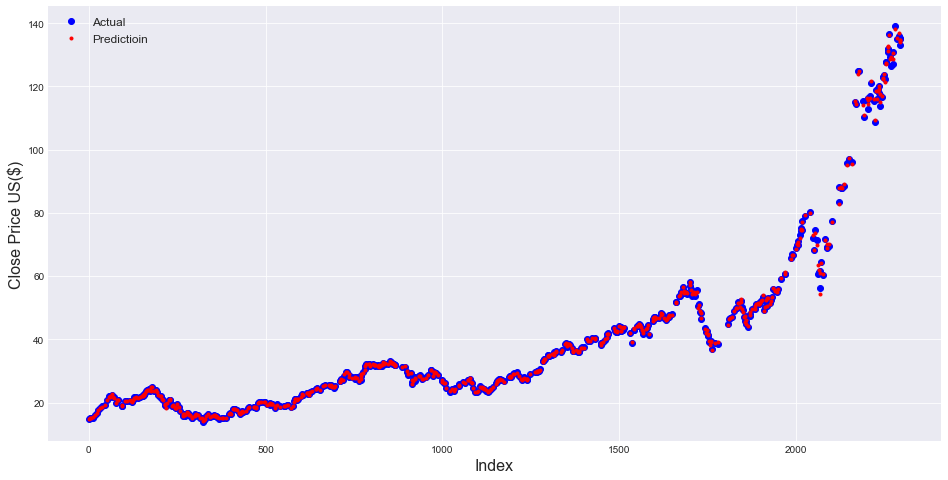

In [27]:
reset_X_test = X_test.reset_index()
index = reset_X_test["index"].to_numpy()
predicted = y_pred_ls.to_numpy()

plt.figure(figsize=(16,8))
plt.style.use("seaborn-dark")
plt.grid(True)
plt.xlabel("Index", fontsize=16)
plt.ylabel("Close Price US($)", fontsize=16)


plt.plot(index, y_test, "ob", label="Actual")
plt.plot(index, predicted, ".r", label="Prediction")

plt.legend(["Actual", "Predictioin"], fontsize=12)


### Part-II Questions

- Q1 [5 points] Why `theta_best.shape` shape is (6,)? You should explain completely.

- Answer of Q1: We wanted to use six pieces of information to predict the Closing value that day. But we don't know how valuable those 6 pieces of information are. We know what number is in that column, but we don't know how much weight to give that column in our calculation  So we find those weights that best result in the numbers in the columns summing together to a value very close to the actual value. We call those weights theta, and theta is six dimensional. This six dimension value is the referenced by the "theta_best.shape'. 


- Q2 [5 point] Do some research and find out when/why mae may be favored against mse and vice-versa. In other words, in what situations mae is a better indication of model performance and in what situations mse? Explain your findings completely.

- Answer of Q2: MSE penalizes large errors significantly and shows its value when we want to reflect thise errors in our model evaluation. But MSE also **squares** the units, making it extra incompatible with comparison to other ways of measuring error, i.e. "Apples to Oranges". MAE shines when the data in question does not have many outliers, and we don't mind ignoring them. The MAE introduces a lot less bias when data points are large in value compared to MSE. To summarize, use MSE when errors have an outsized impact, when an error twice as big is actually eight times as bad. Use MAE to reduce the bias introduced when the data has large values. Use MSE when the direction of the error matters, since MAE will erase that distinction. 

## Part-III  Scikit-learn Linear Regression, SVM and XGBoost

In Part-III, you are going to use [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) and [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) to build regression models.

In [28]:
# Build a LinearRegression model and train it on (X_train, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [29]:
type(X_test)

pandas.core.frame.DataFrame

In [30]:
# Test lin_reg on X_test
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_lin_reg

array([[ 24.79640639],
       [ 38.99381548],
       [ 27.76371448],
       [ 23.67694875],
       [ 15.2888181 ],
       [ 31.70747149],
       [ 23.89763039],
       [ 21.26361991],
       [127.56812533],
       [ 39.13367378],
       [133.96400434],
       [ 40.3065204 ],
       [ 46.74271275],
       [ 26.72770008],
       [ 39.24777478],
       [ 24.4387733 ],
       [ 49.65835153],
       [ 15.0115757 ],
       [ 16.3439683 ],
       [ 82.69667467],
       [ 28.15938226],
       [ 72.84389496],
       [ 19.05436465],
       [ 60.57570623],
       [135.41263844],
       [ 21.86583236],
       [ 44.57528282],
       [ 21.59467943],
       [ 48.30583757],
       [ 42.56070332],
       [114.41513134],
       [ 53.06774145],
       [ 18.85490079],
       [ 29.95735468],
       [ 42.83852102],
       [ 29.0619207 ],
       [ 21.76163125],
       [ 26.58468074],
       [ 26.81691438],
       [ 23.32619256],
       [ 19.35523742],
       [ 54.12784611],
       [ 69.94548234],
       [ 16

In [31]:
y_pred_lin_reg.shape

(576, 1)

In [32]:
type(y_pred_lin_reg)

numpy.ndarray

In [33]:
# Compute rmse for lin_reg using your own rmse function
rmse_lin_reg = rmse(y_test.to_numpy(),y_pred_lin_reg)
print('Linear Regression RMSE', rmse_lin_reg)

Linear Regression RMSE 0.3447111285532453


In [34]:
mse_lin_reg = mse(y_test.to_numpy(),y_pred_lin_reg)
print('Linear Regression MSE', mse_lin_reg)

Linear Regression MSE 0.11882576214845202


> Next, you should generate a plot that looks exactly like the following plot. Very minor variance in the blue points is acceptable but the line should be pretty much the same.

> The comment names it `Plot Q3` because question Q3 asks about it.

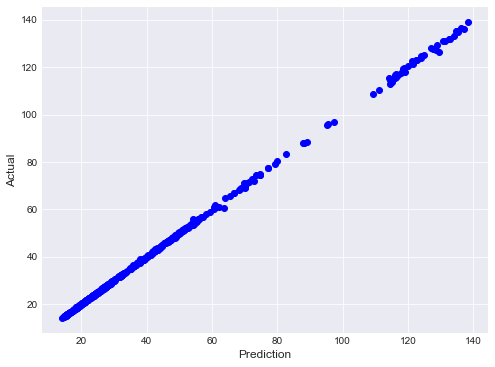

In [35]:
# Plot Q3
plt.figure(figsize=(8,6))
plt.xlabel("Prediction", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.style.use("seaborn-dark")
plt.grid(True)

actual = y_test.to_numpy()
plt.plot(y_pred_lin_reg, actual, "ob" )

> Next build a SVM regression model. Remember that SVM can be used for both classification and regression.

In [36]:
# Build a SVR (SVM Regression) model and train it on (X_train, y_train), 
# kernel should be 'linear'
svm_reg = SVR(kernel='linear', C=0.5)
svm_reg.fit(X_train.to_numpy(), y_train.to_numpy())

SVR(C=0.5, kernel='linear')

In [37]:
# Test svm_reg
y_pred_svm = svm_reg.predict(X_test.to_numpy())
y_pred_svm

array([ 24.88021649,  38.78041039,  27.63120923,  23.77247601,
        15.52384502,  31.86892254,  23.98348897,  21.36797085,
       127.22462754,  39.10610619, 133.69354196,  40.28892082,
        46.76072098,  26.69399204,  39.30336003,  24.51958197,
        49.63606478,  15.18384483,  16.52379216,  82.59631654,
        28.05203227,  72.5575897 ,  19.08176306,  60.55638469,
       135.320495  ,  21.97968995,  44.63099831,  21.75763844,
        48.16467445,  42.49324401, 114.16176641,  52.94475799,
        19.04578255,  30.1044741 ,  42.7129442 ,  29.00048153,
        21.82979355,  26.55543615,  26.89262157,  23.38450141,
        19.58352083,  53.91003236,  69.69747846,  16.42274742,
        28.31305391,  19.12508145, 116.10897815,  69.5757174 ,
        19.59905606,  21.14869124,  20.89929518,  19.55809014,
        27.43204738,  20.98414013,  16.9695836 ,  25.62743001,
        18.51923171,  39.16561197,  47.1607764 ,  26.63059368,
        18.50763041,  38.75689461,  47.70273017,  32.67

In [38]:
y_pred_svm.reshape(576,1)

array([[ 24.88021649],
       [ 38.78041039],
       [ 27.63120923],
       [ 23.77247601],
       [ 15.52384502],
       [ 31.86892254],
       [ 23.98348897],
       [ 21.36797085],
       [127.22462754],
       [ 39.10610619],
       [133.69354196],
       [ 40.28892082],
       [ 46.76072098],
       [ 26.69399204],
       [ 39.30336003],
       [ 24.51958197],
       [ 49.63606478],
       [ 15.18384483],
       [ 16.52379216],
       [ 82.59631654],
       [ 28.05203227],
       [ 72.5575897 ],
       [ 19.08176306],
       [ 60.55638469],
       [135.320495  ],
       [ 21.97968995],
       [ 44.63099831],
       [ 21.75763844],
       [ 48.16467445],
       [ 42.49324401],
       [114.16176641],
       [ 52.94475799],
       [ 19.04578255],
       [ 30.1044741 ],
       [ 42.7129442 ],
       [ 29.00048153],
       [ 21.82979355],
       [ 26.55543615],
       [ 26.89262157],
       [ 23.38450141],
       [ 19.58352083],
       [ 53.91003236],
       [ 69.69747846],
       [ 16

In [39]:
# Compute rmse for svm_reg
rmse_svm = rmse(y_test.to_numpy(),y_pred_svm)
print('SVM RMSE', rmse_svm)
rmse_svm

SVM RMSE 39.488340320626534


39.488340320626534

^I do not know why this comes out this way. You can see for yourself that the predicted value are very tight to the actual values. The check on RMSE algo was good and the linear regression RMSE looks normal.  

In [40]:
mse_svm = mse(y_test.to_numpy(),y_pred_svm)
print('SVM MSE', mse_svm)
mse_svm

SVM MSE 1559.3290212776194


1559.3290212776194

> Next, you should create an [XGBoost Regression](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) model. You can simply `import xgboost` and build a `XGBRegressor()` model and pass this argument `objective ='reg:squarederror'` to it.

In [54]:
# Build a xgb regression model and train it on (X_train, y_train)
xgb_reg = XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# Test xgb_reg
y_pred_xgb = xgb_reg.predict(X_test)

In [56]:
# Compute rmse for xgb_reg
rmse_xgb = rmse(y_test.to_numpy(), y_pred_xgb)
print('XGB RMSE', rmse_xgb)

XGB RMSE 39.56862043592361


In [57]:
mse_xgb = mse(y_test.to_numpy(), y_pred_xgb)
print('XGB MSE', mse_xgb)

XGB MSE 1565.6757232021919


> Hmm! Not so well compared to the previous models. So? --> Yes, you should fine-tune hyperparameters of XGBoost! 

> If a model has a lot of hyperparameters, it is not an easy task to fine-tune them, and as you experienced, `GridSearchCV` takes a lot of time, so this time you're going to use a different search strategy [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) which is much faster and more efficient than `GridSearchCV` (which is more suitable when you have fewer number of combinations). Read its documentation and notice that while it is very similar to `GridSearchCV`, the dict that stores the params/values is a different argument.

> Also, read [this article](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) on the comparison between the two search methods. 

In [65]:
xgb_reg = XGBRegressor(objective ='reg:squarederror')
distributions = {'base_score': loguniform(1e-4, 1e0), 
                 'colsample_bylevel':loguniform(1e-4, 1e0),
                 'colsample_bynode':loguniform(1e-4, 1e0), 
                 'colsample_bytree':loguniform(1e-4, 1e0), 
                 'gamma':loguniform(1e-4, 1e0),  
                 'learning_rate': loguniform(1e-4, 1e0), 
                 'max_delta_step':loguniform(1e-4, 1e0), 
                 'max_depth':randint(6,10),
                 'min_child_weight':randint(1,3), 
                 'n_estimators':randint(75,125),  
                 'random_state':randint(1,3),
                 'reg_alpha': loguniform(1e-4, 1e0), 
                 'reg_lambda': uniform(0,4), 
                 'scale_pos_weight':loguniform(1e-4, 1e0), 
                 'subsample':loguniform(1e-4, 1e0), 
                }
n_iter_search = 20

randomized_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=distributions, n_iter=n_iter_search)
best_xgb_reg = randomized_search.fit(X_train, y_train)
print('Randomized search for hyperparameter tuning of XGBoost Regressor')
print('Best Parameters: ' + str(best_xgb_reg.best_params_))

Randomized search for hyperparameter tuning of XGBoost Regressor
Best Parameters: {'base_score': 0.9564759538952824, 'colsample_bylevel': 0.29474146764062, 'colsample_bynode': 0.39791504069663924, 'colsample_bytree': 0.004655401787663662, 'gamma': 0.046930764143661645, 'learning_rate': 0.20302028655959514, 'max_delta_step': 0.00604293716639764, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 123, 'random_state': 2, 'reg_alpha': 0.3645430126227119, 'reg_lambda': 3.83491683435217, 'scale_pos_weight': 0.01495560460675929, 'subsample': 0.018258623493432605}


In [70]:
# Train and test best_xgb, and compute rmse with your own rmse function
best_xgb = XGBRegressor(objective='reg:squarederror',
                        base_score=0.9564759538952824,  
                        colsample_bylevel=0.29474146764062,
                        colsample_bynode=0.39791504069663924, 
                        colsample_bytree=0.004655401787663662, 
                        gamma=0.046930764143661645, 
                        learning_rate=0.20302028655959514, 
                        max_delta_step=0.00604293716639764, 
                        max_depth=6,
                        min_child_weight=1,  
                        n_estimators=123,   
                        random_state=2,
                        reg_alpha=0.3645430126227119, 
                        reg_lambda=3.83491683435217, 
                        scale_pos_weight=0.01495560460675929, 
                        subsample=0.018258623493432605,
                        )

best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)
rmse_best_xgb = rmse(y_test.to_numpy(), y_pred_best_xgb)
print('Best XGB RMSE', rmse_best_xgb)

Best XGB RMSE 48.466521336895


^ I suspect the value above is due to scaling issues. 

> **Maximum Acceptable RMSE Requirement**: Your rounded `rmse` with two decimal places should be less than 0.50, so if your rounded `rmse` is 0.50 or higher, it is not acceptable. It should be 0.49 or lower; otherwise it gets zero points for this part. The correct implementation of the randomized search and getting the desired rmse has 20 points.

> **Hint**: Because you are using `RandomizedSearchCV` which takes less time, you should run with more hyperparameters and more values, and you may have to run the randomized search multiple times until you get `rmse` below 0.50. If after a few runs you couldn't get the desired result, you may have to repartition the data again (rerun the `train_test_split()` method and try again with a new search). But you should do this experiment patiently as it may take a lot of time and efforts. One has to work tirelessly to gain the required skills in ML and Data Science!

> Last step is calculating another regression performance measure $R^2$ [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). You can use sklearn [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) method. For XGBoost, the $R^2$ score must be for the `best_xgb`. All $R^2$ scores of your regression models should be close to 1. 

In [73]:
r2_ls = r2_score(y_test.to_numpy(),y_pred_ls)
r2_lin_reg = r2_score(y_test.to_numpy(),y_pred_lin_reg)
r2_svm = r2_score(y_test.to_numpy(),y_pred_svm)
r2_xgb = r2_score(y_test.to_numpy(),y_pred_best_xgb)
print('Least Squares R2: ', r2_ls)
print('Linear Regression R2: ', r2_lin_reg)
print('SVM R2: ', r2_svm)
print('XGBoost R2: ', r2_xgb)

Least Squares R2:  0.9998485522493997
Linear Regression R2:  0.9998481222777631
SVM R2:  0.9998213209677563
XGBoost R2:  -2.002390420972787


^Again, I blame scaling issues. Moving on. 

### Part-III Question

- Q3 [5 points] What does `Plot Q3` the Actual-Predicted plot of `lin_reg` model imply? Explain completely. You should justify your answer mathematically, otherwise your answer gets zero.
- Answer of Q3: The slope of 1, i.e. rise = run, shows that there is an almost perfect agreement between the actual and predicted values. Where the predicted value was x, the actual value y was so nearly identical in, across all values of x, that a slope of one developed. 

## Grading

Assignment-2 has a maximum of 100 points. **You must run all cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!** Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I - 10 points - Incorrect/incomplete plot in Part-I gets zero.
   

- Part-II - 50 points
    - Implementation and results: 40 points
        - Correct Least Squares model: 15 points
        - Correct mse, rmse, and mae functions: 25 points
    - Part-II Questions: 10 points
    

- Part-III - 40 points
    - Implementation and results: 35 points
        - Building three regression models: 15 points
        - Randomized search and getting the desired rmse for `best_xgb`: 20 points **Note**: Incorrect `RandomizedSearchCV` and not meeting the rmse requirement get zero.
    - Part-III Question: 5 points
    

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A2.ipynb```. Submit the completed notebook using the ```Assignment-2``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct and complete results and outputs, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Wednesday March 10th, 11:59PM.</b></font>